**Contexto** Una empresa de alquiler de DVD quiere averiguar durante cuántos días alquilará un cliente un DVD basándose en algunas características. 
La empresa quiere un modelo que produzca un MSE de 3 o menos en un conjunto de prueba. 
Se espera que su modelo ayude a la empresa a ser más eficiente en la planificación de inventarios.

Los datos que han proporcionado están en el archivo csv `rental_info.csv`. 

Tiene las siguientes características:

- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

**Guía**:

1. Obtener el número de días de alquiler.

2. Categorización (dummy) y normalización de variables.

3. División entrenamiento-prueba.

4. Selección de características(?)

5. Elección de modelos y ajuste de hiperparámetros

6. Predicción de valores en el conjunto de pruebas

7. Cálculo del error cuadrático medio

In [184]:
#simon londono Rojas

In [185]:
#predecir dias de alquiler
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
df = pd.read_csv('rental_info.csv')
df

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,2005-08-22 10:49:15+00:00,2005-08-29 09:52:15+00:00,6.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,48.8601,7744.0,24.9001
15857,2005-07-31 09:48:49+00:00,2005-08-04 10:53:49+00:00,4.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,24.9001,7744.0,24.9001
15858,2005-08-20 10:35:30+00:00,2005-08-29 13:03:30+00:00,8.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,80.8201,7744.0,24.9001
15859,2005-07-31 13:10:20+00:00,2005-08-08 14:07:20+00:00,7.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,63.8401,7744.0,24.9001


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_date       15861 non-null  object 
 1   return_date       15861 non-null  object 
 2   amount            15861 non-null  float64
 3   release_year      15861 non-null  float64
 4   rental_rate       15861 non-null  float64
 5   length            15861 non-null  float64
 6   replacement_cost  15861 non-null  float64
 7   special_features  15861 non-null  object 
 8   NC-17             15861 non-null  int64  
 9   PG                15861 non-null  int64  
 10  PG-13             15861 non-null  int64  
 11  R                 15861 non-null  int64  
 12  amount_2          15861 non-null  float64
 13  length_2          15861 non-null  float64
 14  rental_rate_2     15861 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


In [188]:
df['rental_date'] = pd.to_datetime(df['rental_date']) 
df['return_date'] = pd.to_datetime(df['return_date'])

df['dias_alquiler'] = (df['return_date'] - df['rental_date']).dt.days
df['release_year'] = df['release_year'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   rental_date       15861 non-null  datetime64[ns, UTC]
 1   return_date       15861 non-null  datetime64[ns, UTC]
 2   amount            15861 non-null  float64            
 3   release_year      15861 non-null  int32              
 4   rental_rate       15861 non-null  float64            
 5   length            15861 non-null  float64            
 6   replacement_cost  15861 non-null  float64            
 7   special_features  15861 non-null  object             
 8   NC-17             15861 non-null  int64              
 9   PG                15861 non-null  int64              
 10  PG-13             15861 non-null  int64              
 11  R                 15861 non-null  int64              
 12  amount_2          15861 non-null  float64            
 13  l

In [189]:
df['special_features'].value_counts()

special_features
{Trailers,Commentaries,"Behind the Scenes"}                     1308
{Trailers}                                                      1139
{Trailers,Commentaries}                                         1129
{Trailers,"Behind the Scenes"}                                  1122
{"Behind the Scenes"}                                           1108
{Commentaries,"Deleted Scenes","Behind the Scenes"}             1101
{Commentaries}                                                  1089
{Commentaries,"Behind the Scenes"}                              1078
{Trailers,"Deleted Scenes"}                                     1047
{"Deleted Scenes","Behind the Scenes"}                          1035
{"Deleted Scenes"}                                              1023
{Commentaries,"Deleted Scenes"}                                 1011
{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}     983
{Trailers,Commentaries,"Deleted Scenes"}                         916
{Trailers,"Delete

In [190]:
df_copy = df.copy()

In [191]:
X = df_copy.iloc[:, :-1]
y = df_copy.iloc[:,-1]

In [192]:
X['special_features'] = X['special_features'].str.strip('{}').str.replace('"', '')
X['special_features'] = X['special_features'].str.split(',')

#multi-label one-hot encoding
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
special_features_df = pd.DataFrame(mlb.fit_transform(X['special_features']),
                                   columns=mlb.classes_,
                                   index=X.index)
X = pd.concat([X.drop(columns=['special_features']), special_features_df], axis=1)

In [193]:
X['rental_day_week'] = X['rental_date'].dt.dayofweek
X['retnal_month'] = X['rental_date'].dt.month
X['rental_hour'] = X['rental_date'].dt.hour
X['is_weekend'] = X['rental_day_week'].isin([5, 6]).astype(int)

In [194]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   rental_date        15861 non-null  datetime64[ns, UTC]
 1   return_date        15861 non-null  datetime64[ns, UTC]
 2   amount             15861 non-null  float64            
 3   release_year       15861 non-null  int32              
 4   rental_rate        15861 non-null  float64            
 5   length             15861 non-null  float64            
 6   replacement_cost   15861 non-null  float64            
 7   NC-17              15861 non-null  int64              
 8   PG                 15861 non-null  int64              
 9   PG-13              15861 non-null  int64              
 10  R                  15861 non-null  int64              
 11  amount_2           15861 non-null  float64            
 12  length_2           15861 non-null  float64    

In [195]:
X = X.drop(columns=['return_date', 'rental_date'])

In [196]:
#cat_col = df_copy.select_dtypes(include = ['object']).columns.to_list()
num_col = X.select_dtypes(include = ['int32','int64', 'float64']).columns.to_list()
#cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder())])
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
preprocessor = ColumnTransformer(transformers = [('numeric', num_transformer, num_col)],
                                 remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['amount', 'release_year', 'rental_rate',
                                  'length', 'replacement_cost', 'NC-17', 'PG',
                                  'PG-13', 'R', 'amount_2', 'length_2',
                                  'rental_rate_2', 'Behind the Scenes',
                                  'Commentaries', 'Deleted Scenes', 'Trailers',
                                  'rental_day_week', 'retnal_month',
                                  'rental_hour', 'is_weekend'])])

In [197]:
data_pre = preprocessor.fit_transform(X)
#cod_cat = preprocessor.named_transformers_['categorical']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col])
data_pro = pd.DataFrame(data_pre, columns = labels)
data_pro

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,Behind the Scenes,Commentaries,Deleted Scenes,Trailers,rental_day_week,retnal_month,rental_hour,is_weekend
0,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,0.055750,0.428540,0.332776,1.0,0.0,0.0,1.0,0.333333,0.000000,0.086957,0.0
1,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,0.055750,0.428540,0.332776,1.0,0.0,0.0,1.0,0.333333,0.333333,1.000000,0.0
2,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,0.055750,0.428540,0.332776,1.0,0.0,0.0,1.0,1.000000,0.666667,0.173913,1.0
3,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,0.055750,0.428540,0.332776,1.0,0.0,0.0,1.0,1.000000,0.666667,0.521739,1.0
4,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,0.055750,0.428540,0.332776,1.0,0.0,0.0,1.0,0.666667,1.000000,0.521739,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,0.545455,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,0.335341,0.175278,1.000000,1.0,0.0,1.0,1.0,0.000000,1.000000,0.434783,0.0
15857,0.363636,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,0.167530,0.175278,1.000000,1.0,0.0,1.0,1.0,1.000000,0.666667,0.391304,1.0
15858,0.727273,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,0.559182,0.175278,1.000000,1.0,0.0,1.0,1.0,0.833333,1.000000,0.434783,1.0
15859,0.636364,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,0.440258,0.175278,1.000000,1.0,0.0,1.0,1.0,1.000000,0.666667,0.565217,1.0


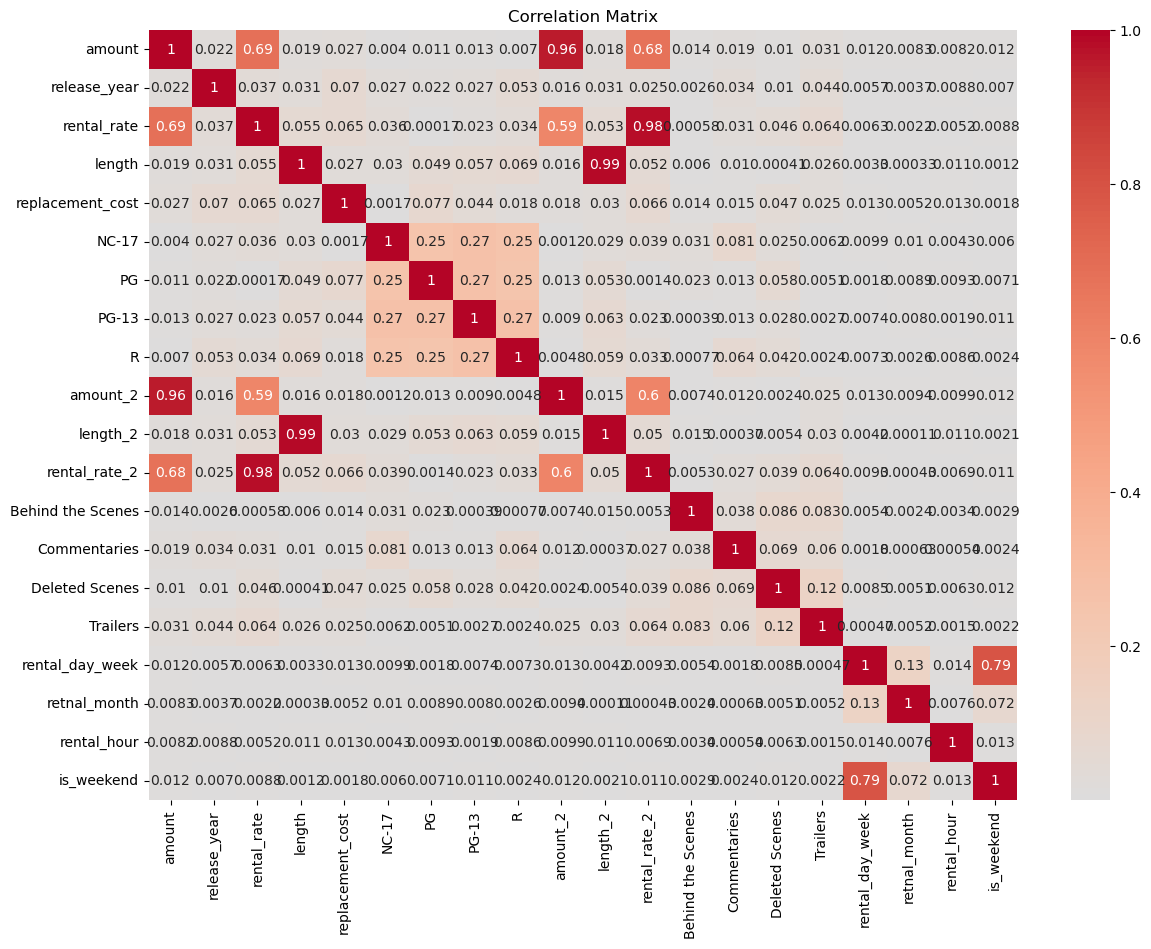

In [198]:
corr_matrix = data_pro.corr().abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [199]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper.stack()[upper.stack() > 0.5].sort_values(ascending=False)
print(high_corr_pairs)

length           length_2         0.987667
rental_rate      rental_rate_2    0.982489
amount           amount_2         0.956141
rental_day_week  is_weekend       0.793380
amount           rental_rate      0.685870
                 rental_rate_2    0.678597
amount_2         rental_rate_2    0.596622
rental_rate      amount_2         0.587627
dtype: float64


In [200]:
data_pro.drop(columns=['length_2','rental_rate_2', 'amount_2'], inplace=True)

In [201]:
data_pro

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,Behind the Scenes,Commentaries,Deleted Scenes,Trailers,rental_day_week,retnal_month,rental_hour,is_weekend
0,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.333333,0.000000,0.086957,0.0
1,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.333333,0.333333,1.000000,0.0
2,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.000000,0.666667,0.173913,1.0
3,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.000000,0.666667,0.521739,1.0
4,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.666667,1.000000,0.521739,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,0.545455,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.000000,1.000000,0.434783,0.0
15857,0.363636,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.000000,0.666667,0.391304,1.0
15858,0.727273,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.833333,1.000000,0.434783,1.0
15859,0.636364,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.000000,0.666667,0.565217,1.0


In [202]:
X_train, X_test, y_train, y_test = train_test_split(data_pro, y, train_size = 0.7, random_state=42)

In [203]:
print(f'El tamaño del conjutno de entrenamiento es X: {X_train.shape} - y: {y_train.shape}')
print(f'El tamaño del conjutno de validación es X: {X_test.shape} - y: {y_test.shape}')

El tamaño del conjutno de entrenamiento es X: (11102, 17) - y: (11102,)
El tamaño del conjutno de validación es X: (4759, 17) - y: (4759,)


### Models

In [204]:
#LinearRegression
modelo_LR = LinearRegression()
modelo_LR.fit(X_train, y_train)

LinearRegression()

In [205]:
y_pred_test_LR = modelo_LR.predict(X_test)

In [206]:
mse = mean_squared_error(y_test, y_pred_test_LR)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 2.9535


In [207]:
modelo_LR.coef_

array([12.85126046,  0.05967574, -4.60635308,  0.12220938, -0.01291641,
        0.15536838,  0.12110898,  0.09374872, -0.08598292,  0.03866382,
       -0.03308805, -0.12533067, -0.1131523 , -0.12032229, -0.02177853,
       -0.02268329,  0.09212529])

In [208]:
#RandomForestRegressor
modelo_RF = RandomForestRegressor(random_state=42, n_estimators=100)
modelo_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [209]:
y_pred_test_FC = modelo_RF.predict(X_test)

In [210]:
mse = mean_squared_error(y_test, y_pred_test_FC)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 2.2093


In [211]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_RF, data_pro, y, cv=5, scoring='neg_mean_squared_error')
print(f"Average MSE: {-scores.mean():.4f}")

#better generalization
#the seed for randomforest could be easier

Average MSE: 2.5883


In [212]:
data_pro.columns

Index(['amount', 'release_year', 'rental_rate', 'length', 'replacement_cost',
       'NC-17', 'PG', 'PG-13', 'R', 'Behind the Scenes', 'Commentaries',
       'Deleted Scenes', 'Trailers', 'rental_day_week', 'retnal_month',
       'rental_hour', 'is_weekend'],
      dtype='object')

In [213]:
modelo_RF.feature_importances_

array([0.49328413, 0.028229  , 0.16024866, 0.06762585, 0.04760013,
       0.00661059, 0.00608153, 0.00668645, 0.0062481 , 0.00892994,
       0.0089447 , 0.00904841, 0.00907581, 0.0392939 , 0.02567123,
       0.07127448, 0.00514709])

In [215]:
modelo_RF_tune = RandomForestRegressor(
    n_estimators=200,      # Number of trees
    max_depth=10,          # Limit depth to reduce overfitting
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=3,    # Minimum samples in leaf
    random_state=42,
    n_jobs=-1              # Use all cores
)
modelo_RF_tune.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [216]:
y_pred_test_tune = modelo_RF_tune.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test_tune)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 2.2382
